<a href="https://colab.research.google.com/github/RenanNB360/PyTorch/blob/main/Style_Transfer_with_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importações

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
from torch.nn.functional import mse_loss
from torchvision import transforms, models
from datetime import datetime
torch.__version__

'2.1.0+cu118'

In [2]:
torch.manual_seed(123)

# Etapa 2: Base de dados

In [3]:
model = models.vgg19(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 84.2MB/s]


In [4]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [5]:
model = model.features

In [6]:
for param in model.parameters():
  param.requires_grad = False

In [7]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [8]:
model.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

# Etapa 3: Processamento das imagens

In [9]:
!wget https://pbs.twimg.com/profile_images/923692524866297866/KvymiJuq_400x400.jpg
!wget https://jornal.usp.br/wp-content/uploads/O-Mamoeiro2.jpg

--2023-10-28 21:24:23--  https://pbs.twimg.com/profile_images/923692524866297866/KvymiJuq_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 72.21.91.70, 2606:2800:220:1410:489:141e:20bb:12f6
Connecting to pbs.twimg.com (pbs.twimg.com)|72.21.91.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25149 (25K) [image/jpeg]
Saving to: ‘KvymiJuq_400x400.jpg’

KvymiJuq_400x400.jp 100%[===================>]  24.56K  --.-KB/s    in 0s      

2023-10-28 21:24:23 (216 MB/s) - ‘KvymiJuq_400x400.jpg’ saved [25149/25149]

--2023-10-28 21:24:23--  https://jornal.usp.br/wp-content/uploads/O-Mamoeiro2.jpg
Resolving jornal.usp.br (jornal.usp.br)... 200.144.248.54
Connecting to jornal.usp.br (jornal.usp.br)|200.144.248.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84821 (83K) [image/jpeg]
Saving to: ‘O-Mamoeiro2.jpg’

O-Mamoeiro2.jpg     100%[===================>]  82.83K   201KB/s    in 0.4s    

2023-10-28 21:24:25 (201 KB/s) - ‘O-Mamoeiro2.j

In [10]:
new_img = 0
style_img = 0

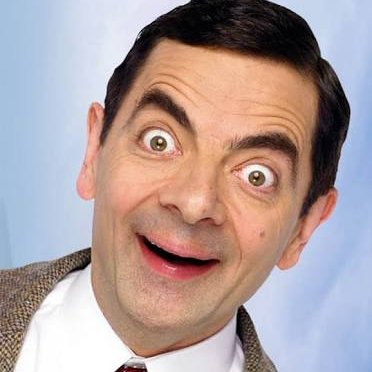

In [11]:
new_img = Image.open('/content/KvymiJuq_400x400.jpg')
new_img

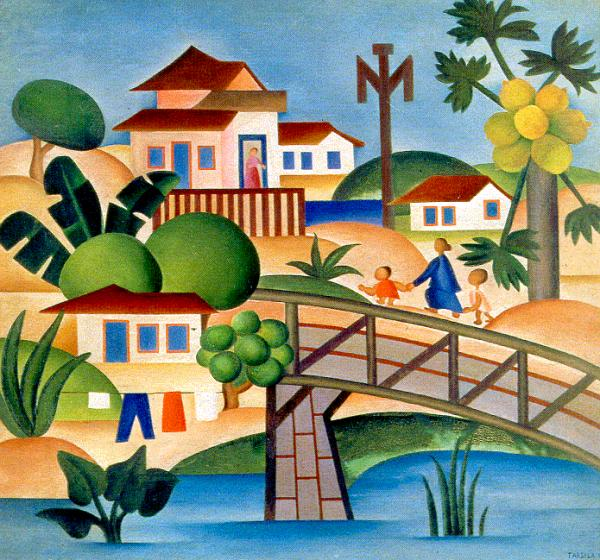

In [12]:
style_img = Image.open('/content/O-Mamoeiro2.jpg')
style_img

In [13]:
transform = transforms.Compose([transforms.Resize(300),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),
                                                      (0.229, 0.224, 0.225))])

In [14]:
new_img = transform(new_img)
new_img.shape

torch.Size([3, 300, 300])

In [15]:
shape = new_img.shape[1:]
shape

torch.Size([300, 300])

In [16]:
transform = transforms.Compose([transforms.Resize(shape),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),
                                                      (0.229, 0.224, 0.225))])

In [17]:
style_img = transform(style_img)
style_img.shape

torch.Size([3, 300, 300])

In [18]:
new_img = new_img.unsqueeze(0)
style_img = style_img.unsqueeze(0)
new_img.shape, style_img.shape

(torch.Size([1, 3, 300, 300]), torch.Size([1, 3, 300, 300]))

In [19]:
def show_img(img):
  img = img.cpu().clone().detach().numpy().squeeze()
  img = img.transpose(1, 2, 0)
  img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  img = img.clip(0, 1)

  return img

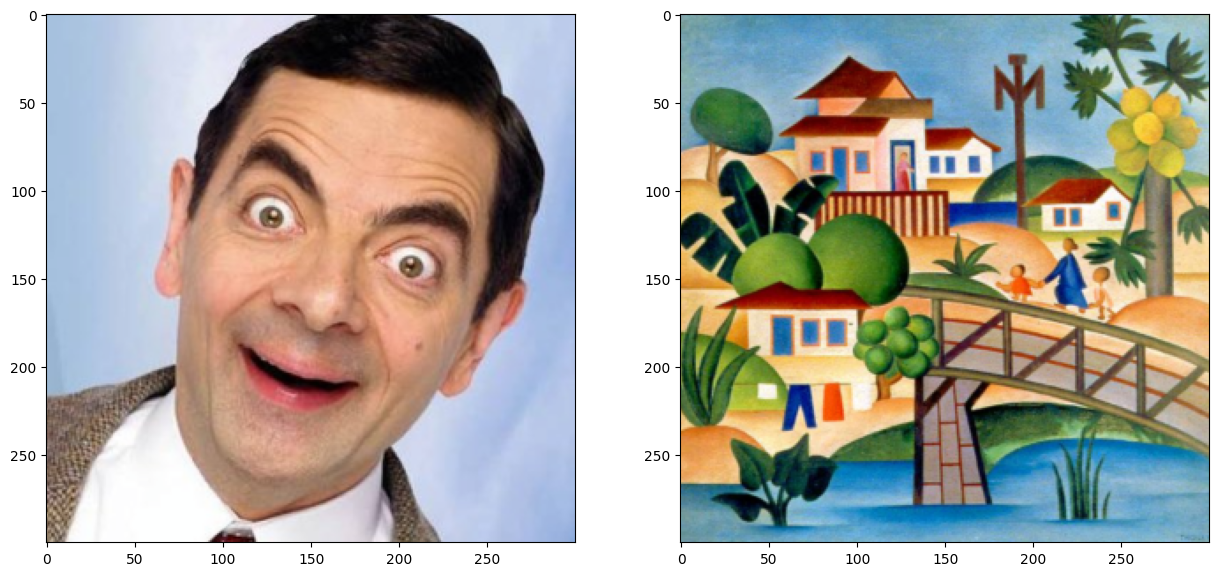

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].imshow(show_img(new_img))
ax[1].imshow(show_img(style_img))

# Etapa 4: Preparação da estrutura de rede

In [21]:
def extract_features(image):

  layers = [0, 5, 10, 19, 21, 28]
  features = {}

  for n in range(37):
    image = model[n](image)
    if n in layers:
      features[n] = image

  return features

In [22]:
new_img, style_img = new_img.to(device), style_img.to(device)

In [23]:
new_img_features = extract_features(new_img)
style_img_features = extract_features(style_img)

In [24]:
def gram_matrix(tensor):
  b, c, h, w = tensor.size()

  tensor = tensor.view(c, h * w)

  gram_matrix = torch.mm(tensor, tensor.t())

  return gram_matrix

In [25]:
style_img_grams = {layer: gram_matrix(style_img_features[layer]) for layer in style_img_features}

In [26]:
style_weights = {0: 1.,
                 5: 0.8,
                 10: 0.6,
                 19: 0.4,
                 28: 0.2}

In [27]:
content_weight = 1
style_weight = 1e6

In [28]:
target_img = new_img.clone().requires_grad_(True).to(device)

In [29]:
optimizer = optim.Adam([target_img], lr = 0.002)

# Etapa 5: Treinamento

ÉPOCA 0001/3000 | perda conteúdo: 0.000 | perda estilo: 500.010 | perda TOTAL: 500010048.0
ÉPOCA 0002/3000 | perda conteúdo: 0.035 | perda estilo: 494.295 | perda TOTAL: 494295264.0
ÉPOCA 0003/3000 | perda conteúdo: 0.139 | perda estilo: 488.541 | perda TOTAL: 488540864.0
ÉPOCA 0004/3000 | perda conteúdo: 0.301 | perda estilo: 482.759 | perda TOTAL: 482759200.0
ÉPOCA 0005/3000 | perda conteúdo: 0.506 | perda estilo: 476.940 | perda TOTAL: 476940288.0
ÉPOCA 0006/3000 | perda conteúdo: 0.744 | perda estilo: 471.076 | perda TOTAL: 471076224.0
ÉPOCA 0007/3000 | perda conteúdo: 1.011 | perda estilo: 465.185 | perda TOTAL: 465185152.0
ÉPOCA 0008/3000 | perda conteúdo: 1.303 | perda estilo: 459.280 | perda TOTAL: 459280160.0
ÉPOCA 0009/3000 | perda conteúdo: 1.617 | perda estilo: 453.384 | perda TOTAL: 453383776.0
ÉPOCA 0010/3000 | perda conteúdo: 1.945 | perda estilo: 447.505 | perda TOTAL: 447504896.0
ÉPOCA 0011/3000 | perda conteúdo: 2.285 | perda estilo: 441.654 | perda TOTAL: 441654048.0

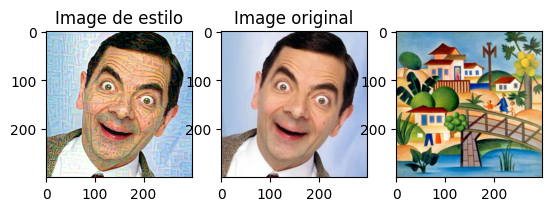

ÉPOCA 0501/3000 | perda conteúdo: 17.754 | perda estilo: 36.894 | perda TOTAL: 36894092.0
ÉPOCA 0502/3000 | perda conteúdo: 17.760 | perda estilo: 36.820 | perda TOTAL: 36820040.0
ÉPOCA 0503/3000 | perda conteúdo: 17.766 | perda estilo: 36.746 | perda TOTAL: 36746232.0
ÉPOCA 0504/3000 | perda conteúdo: 17.772 | perda estilo: 36.673 | perda TOTAL: 36672664.0
ÉPOCA 0505/3000 | perda conteúdo: 17.778 | perda estilo: 36.599 | perda TOTAL: 36599308.0
ÉPOCA 0506/3000 | perda conteúdo: 17.785 | perda estilo: 36.526 | perda TOTAL: 36526208.0
ÉPOCA 0507/3000 | perda conteúdo: 17.791 | perda estilo: 36.453 | perda TOTAL: 36453332.0
ÉPOCA 0508/3000 | perda conteúdo: 17.797 | perda estilo: 36.381 | perda TOTAL: 36380720.0
ÉPOCA 0509/3000 | perda conteúdo: 17.802 | perda estilo: 36.308 | perda TOTAL: 36308312.0
ÉPOCA 0510/3000 | perda conteúdo: 17.808 | perda estilo: 36.236 | perda TOTAL: 36236128.0
ÉPOCA 0511/3000 | perda conteúdo: 17.814 | perda estilo: 36.164 | perda TOTAL: 36164192.0
ÉPOCA 0512

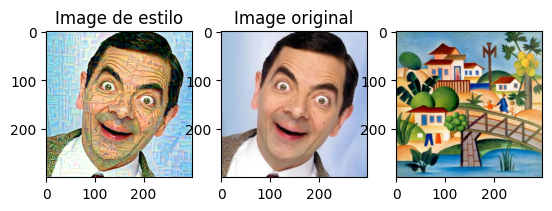

ÉPOCA 1001/3000 | perda conteúdo: 19.659 | perda estilo: 16.943 | perda TOTAL: 16943094.0
ÉPOCA 1002/3000 | perda conteúdo: 19.661 | perda estilo: 16.923 | perda TOTAL: 16923460.0
ÉPOCA 1003/3000 | perda conteúdo: 19.664 | perda estilo: 16.904 | perda TOTAL: 16903890.0
ÉPOCA 1004/3000 | perda conteúdo: 19.666 | perda estilo: 16.884 | perda TOTAL: 16884366.0
ÉPOCA 1005/3000 | perda conteúdo: 19.669 | perda estilo: 16.865 | perda TOTAL: 16864890.0
ÉPOCA 1006/3000 | perda conteúdo: 19.671 | perda estilo: 16.845 | perda TOTAL: 16845466.0
ÉPOCA 1007/3000 | perda conteúdo: 19.674 | perda estilo: 16.826 | perda TOTAL: 16826078.0
ÉPOCA 1008/3000 | perda conteúdo: 19.676 | perda estilo: 16.807 | perda TOTAL: 16806736.0
ÉPOCA 1009/3000 | perda conteúdo: 19.679 | perda estilo: 16.787 | perda TOTAL: 16787450.0
ÉPOCA 1010/3000 | perda conteúdo: 19.682 | perda estilo: 16.768 | perda TOTAL: 16768214.0
ÉPOCA 1011/3000 | perda conteúdo: 19.684 | perda estilo: 16.749 | perda TOTAL: 16749019.0
ÉPOCA 1012

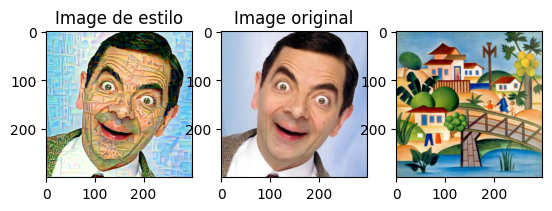

ÉPOCA 1501/3000 | perda conteúdo: 20.638 | perda estilo: 10.989 | perda TOTAL: 10989340.0
ÉPOCA 1502/3000 | perda conteúdo: 20.640 | perda estilo: 10.982 | perda TOTAL: 10982097.0
ÉPOCA 1503/3000 | perda conteúdo: 20.642 | perda estilo: 10.975 | perda TOTAL: 10974863.0
ÉPOCA 1504/3000 | perda conteúdo: 20.643 | perda estilo: 10.968 | perda TOTAL: 10967639.0
ÉPOCA 1505/3000 | perda conteúdo: 20.645 | perda estilo: 10.960 | perda TOTAL: 10960425.0
ÉPOCA 1506/3000 | perda conteúdo: 20.646 | perda estilo: 10.953 | perda TOTAL: 10953232.0
ÉPOCA 1507/3000 | perda conteúdo: 20.648 | perda estilo: 10.946 | perda TOTAL: 10946035.0
ÉPOCA 1508/3000 | perda conteúdo: 20.650 | perda estilo: 10.939 | perda TOTAL: 10938854.0
ÉPOCA 1509/3000 | perda conteúdo: 20.651 | perda estilo: 10.932 | perda TOTAL: 10931685.0
ÉPOCA 1510/3000 | perda conteúdo: 20.653 | perda estilo: 10.925 | perda TOTAL: 10924526.0
ÉPOCA 1511/3000 | perda conteúdo: 20.655 | perda estilo: 10.917 | perda TOTAL: 10917376.0
ÉPOCA 1512

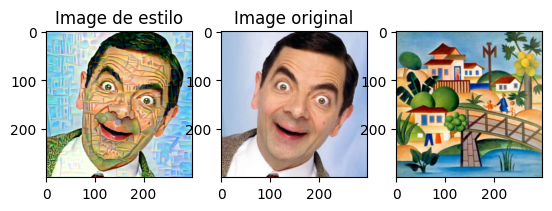

ÉPOCA 2001/3000 | perda conteúdo: 21.383 | perda estilo: 8.222 | perda TOTAL: 8221700.0
ÉPOCA 2002/3000 | perda conteúdo: 21.385 | perda estilo: 8.217 | perda TOTAL: 8217315.0
ÉPOCA 2003/3000 | perda conteúdo: 21.386 | perda estilo: 8.213 | perda TOTAL: 8212931.0
ÉPOCA 2004/3000 | perda conteúdo: 21.388 | perda estilo: 8.209 | perda TOTAL: 8208548.0
ÉPOCA 2005/3000 | perda conteúdo: 21.389 | perda estilo: 8.204 | perda TOTAL: 8204172.5
ÉPOCA 2006/3000 | perda conteúdo: 21.391 | perda estilo: 8.200 | perda TOTAL: 8199796.0
ÉPOCA 2007/3000 | perda conteúdo: 21.392 | perda estilo: 8.195 | perda TOTAL: 8195427.5
ÉPOCA 2008/3000 | perda conteúdo: 21.393 | perda estilo: 8.191 | perda TOTAL: 8191062.5
ÉPOCA 2009/3000 | perda conteúdo: 21.395 | perda estilo: 8.187 | perda TOTAL: 8186701.5
ÉPOCA 2010/3000 | perda conteúdo: 21.396 | perda estilo: 8.182 | perda TOTAL: 8182343.0
ÉPOCA 2011/3000 | perda conteúdo: 21.398 | perda estilo: 8.178 | perda TOTAL: 8177989.5
ÉPOCA 2012/3000 | perda conteúdo

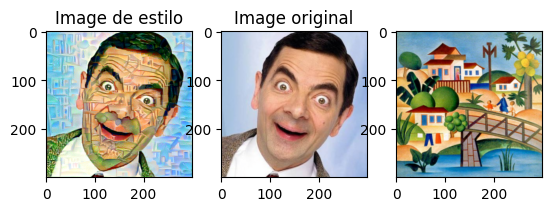

ÉPOCA 2501/3000 | perda conteúdo: 21.980 | perda estilo: 6.379 | perda TOTAL: 6378621.5
ÉPOCA 2502/3000 | perda conteúdo: 21.981 | perda estilo: 6.376 | perda TOTAL: 6375525.0
ÉPOCA 2503/3000 | perda conteúdo: 21.982 | perda estilo: 6.372 | perda TOTAL: 6372426.5
ÉPOCA 2504/3000 | perda conteúdo: 21.983 | perda estilo: 6.369 | perda TOTAL: 6369328.5
ÉPOCA 2505/3000 | perda conteúdo: 21.984 | perda estilo: 6.366 | perda TOTAL: 6366234.0
ÉPOCA 2506/3000 | perda conteúdo: 21.984 | perda estilo: 6.363 | perda TOTAL: 6363138.5
ÉPOCA 2507/3000 | perda conteúdo: 21.985 | perda estilo: 6.360 | perda TOTAL: 6360048.5
ÉPOCA 2508/3000 | perda conteúdo: 21.986 | perda estilo: 6.357 | perda TOTAL: 6356960.0
ÉPOCA 2509/3000 | perda conteúdo: 21.987 | perda estilo: 6.354 | perda TOTAL: 6353873.0
ÉPOCA 2510/3000 | perda conteúdo: 21.988 | perda estilo: 6.351 | perda TOTAL: 6350786.0
ÉPOCA 2511/3000 | perda conteúdo: 21.989 | perda estilo: 6.348 | perda TOTAL: 6347703.0
ÉPOCA 2512/3000 | perda conteúdo

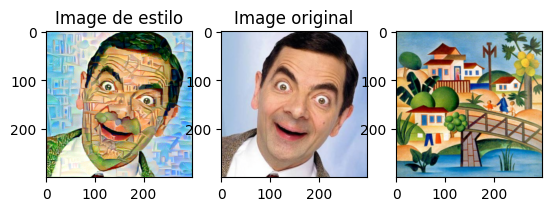

Processo demorou 0:01:47.590038


In [31]:
epochs = 3000
print_every = 500

start = datetime.now()
for epoch in range(epochs):

  target_img_features = extract_features(target_img)
  target_img_content_features = target_img_features[21]
  new_img_content_features = new_img_features[21]

  content_loss = mse_loss(target_img_content_features, new_img_content_features)


  style_loss = 0
  for layer in style_weights:
    target_img_feature = target_img_features[layer]
    _, c, h, w = target_img_feature.shape
    target_img_gram = gram_matrix(target_img_feature)
    style_img_gram = style_img_grams[layer]
    layer_loss = style_weights[layer] * mse_loss(target_img_gram, style_img_gram)
    layer_loss /= c * h * w
    style_loss += layer_loss

  total_loss = content_weight * content_loss + style_weight * style_loss

  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()

  print('ÉPOCA {:04d}/{} | perda conteúdo: {:3.3f} | perda estilo: {:3.3f} | perda TOTAL: {}'.format(epoch + 1,
                                                                                    epochs,
                                                                                    content_loss.item(),
                                                                                    style_loss.item(),
                                                                                    total_loss.item()))

  if (epoch + 1)% print_every == 0:
    print(f'Perda Total: {total_loss.item()}')
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(show_img(target_img))
    ax1.set_title('Image alvo')
    ax2.imshow(show_img(new_img))
    ax2.set_title('Image original')
    ax3.imshow(show_img(style_img))
    ax1.set_title('Image de estilo')
    plt.show()

end = datetime.now()

print(f'Processo demorou {end - start}')

# Etapa 6: Resultados

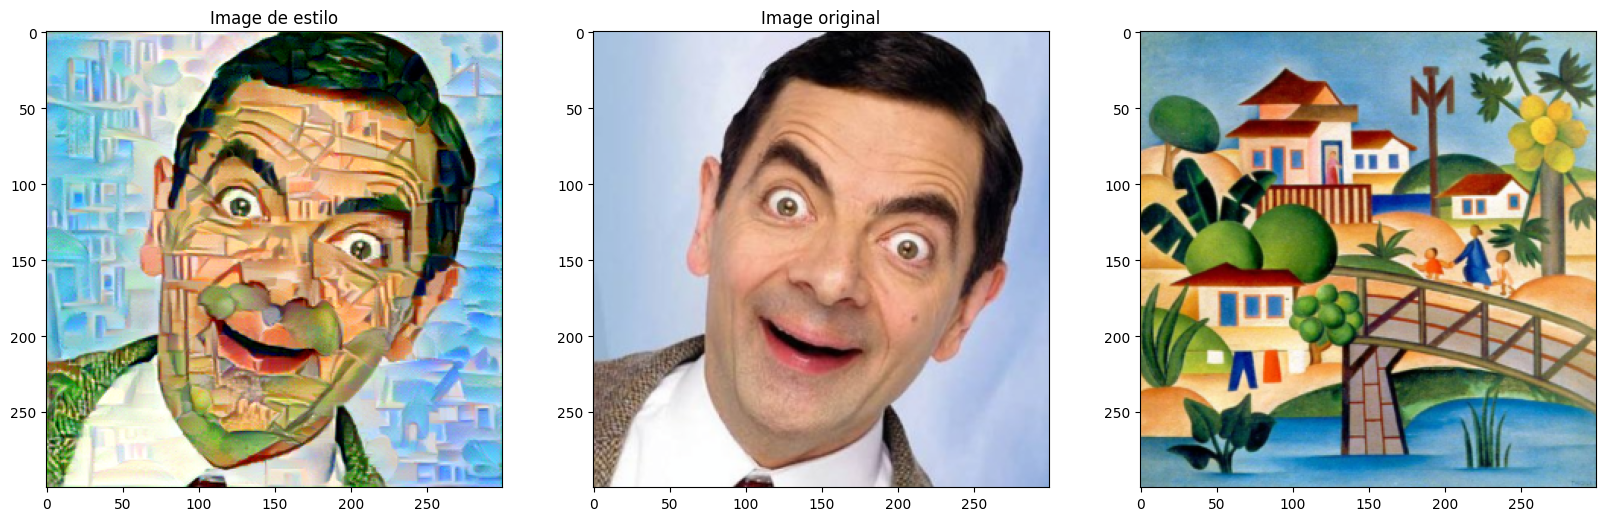

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))
ax1.imshow(show_img(target_img))
ax1.set_title('Image alvo')
ax2.imshow(show_img(new_img))
ax2.set_title('Image original')
ax3.imshow(show_img(style_img))
ax1.set_title('Image de estilo')
plt.show()